Note: requires matplotlib and scikit-learn

I forgot to include matplotlib in the setup instructions so you'll need to run >>conda install matplotlib, after you activate your environment.

Scikit-Learn documentation may be found here: https://scikit-learn.org/stable/modules/classes.html#

Start by importing the toy dataset we will work with, Boston Housing Data.  Boston Housing Data is a dictionary datastructure which is a python primative.  It is implemented as a hash-table so there is a O(1) lookup time associated with te datastructure.  Dictionaries are structured as dict{key, value} and can be iterated over as follows, dict[key] = value 

In [1]:
from sklearn.datasets import load_boston
dataset= load_boston()
data_x, data_y = dataset['data'], dataset['target']
print(dataset['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Next We import a tool which will split our data into a training sample and a testing sample.  The idea is to use the training sample to teach the model about the data, and use the testing sample to ensure the bias/variance is low.


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

print("Training Data dimensins: ", x_train.shape, y_train.shape)
print("Testing Data dimensions: ", x_test.shape, y_test.shape)

Training Data dimensins:  (354, 13) (354,)
Testing Data dimensions:  (152, 13) (152,)


This is the heart of the scikit-learn workflow.  Below we implement a linear regression model without regularization, but you could easily replace LinearRegression with any model you want to implement.  

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

predictions = model.predict(x_test)

model.score(x_test, y_test)

0.6965896234168687

Making a plot to visualize our predictions vs the true values

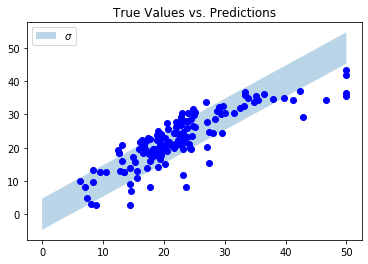

In [4]:
import numpy as np
variance = ((predictions - y_test)**2).mean()
sd = np.sqrt(variance)

import matplotlib.pyplot as plt
plt.title('True Values vs. Predictions')
plt.plot(y_test, predictions, 'ob')
plt.fill_between([0,50], [0,50]+sd, [0,50]-sd, alpha=0.3, label='$\sigma$')
plt.legend(loc='upper left')
plt.show()

Random Forest: Usually a data scientist's first instinct

In [5]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.8805924330224876